# Portfolio optimisation on python

## Import the data

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

import warnings

In [2]:
#import pickle file
df = pd.read_pickle('data_acti.pkl')

In [3]:
df.head()

instrumentid,30566,30563,30560,30556,30555,30565,30557,30553,30568,30571,...,30570,30564,30569,30579,30578,2,7403,7,7401,1
2000-01-03,-0.008091,NaN,NaN,NaN,-0.004274,-0.002231,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.012706,-0.003801,-0.005355,-0.004181,-0.000878
2000-01-04,0.004894,-0.001542,0.000125,NaN,0.003365,0.001258,NaN,-0.008427,-0.011169,NaN,...,NaN,-0.041044,NaN,NaN,NaN,-0.014512,-0.029296,-0.007350,-0.018245,0.001154
2000-01-05,-0.007035,-0.002668,-0.000125,-0.006384,-0.003931,-0.001303,NaN,-0.007912,0.008456,NaN,...,-0.020489,-0.012950,NaN,NaN,NaN,-0.003386,-0.011830,-0.001131,-0.003765,-0.000240
2000-01-06,0.003270,-0.001408,0.000000,-0.001046,0.001857,0.000699,NaN,0.004431,-0.006994,NaN,...,-0.012488,0.012675,NaN,NaN,NaN,-0.001160,-0.014303,0.004081,-0.004351,-0.000709
2000-01-07,0.004074,0.008177,0.004863,0.004487,0.002202,0.000698,NaN,0.003088,0.001404,NaN,...,0.006850,0.021739,NaN,NaN,NaN,0.005831,0.003924,-0.000151,0.006369,-0.001186


In [4]:
#import mappind file
mapping = pd.read_excel('mapping.xlsx')

In [5]:
mapping = mapping.set_index('instrumentid')
mapping.head()

,shortname,longname,assetclass,type
instrumentid,,,,
30566,USTreas,US 10Y Treasury Note,BOND,FUTURE
30563,Bund,German Bund,BOND,FUTURE
30560,Bobl,German Medium-Term Debt,BOND,FUTURE
30556,Gilt,UK 10Y Note,BOND,FUTURE
30555,UST5Y,US 5Y Treasury Note,BOND,FUTURE


In [6]:
#matching the columns name with the mapping
dic_columns = {}
for column in df.columns:
    dic_columns[column] = mapping.loc[column,'shortname']
df.rename(columns = dic_columns, inplace = True)

In [7]:
df.head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2000-01-03,-0.008091,NaN,NaN,NaN,-0.004274,-0.002231,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.012706,-0.003801,-0.005355,-0.004181,-0.000878
2000-01-04,0.004894,-0.001542,0.000125,NaN,0.003365,0.001258,NaN,-0.008427,-0.011169,NaN,...,NaN,-0.041044,NaN,NaN,NaN,-0.014512,-0.029296,-0.007350,-0.018245,0.001154
2000-01-05,-0.007035,-0.002668,-0.000125,-0.006384,-0.003931,-0.001303,NaN,-0.007912,0.008456,NaN,...,-0.020489,-0.012950,NaN,NaN,NaN,-0.003386,-0.011830,-0.001131,-0.003765,-0.000240
2000-01-06,0.003270,-0.001408,0.000000,-0.001046,0.001857,0.000699,NaN,0.004431,-0.006994,NaN,...,-0.012488,0.012675,NaN,NaN,NaN,-0.001160,-0.014303,0.004081,-0.004351,-0.000709
2000-01-07,0.004074,0.008177,0.004863,0.004487,0.002202,0.000698,NaN,0.003088,0.001404,NaN,...,0.006850,0.021739,NaN,NaN,NaN,0.005831,0.003924,-0.000151,0.006369,-0.001186


#### Converting back to prices ... special case here

In [8]:
df = np.cumprod(1 + df) * 1 #or whatever number

## Adding obvious errors or missing values in the data

In [9]:
df.loc['2013-04-12','UsEq'] = np.NaN

In [10]:
df.loc['2017-04-12','CHF'] = np.NaN

In [11]:
df.loc['2012-04-12','AUGOV'] = 8.4

In [12]:
df.loc['2014-04-16','JPY'] = -10

In [13]:
for i in range(len(df)):
    if random.uniform(0, 1) > 0.9:
        df.iloc[i,df.columns.get_loc("TIPS")] = np.NaN

## Cleaning unstructured or abstract time series from "multiple" "non-conform" sources

(0, 1)

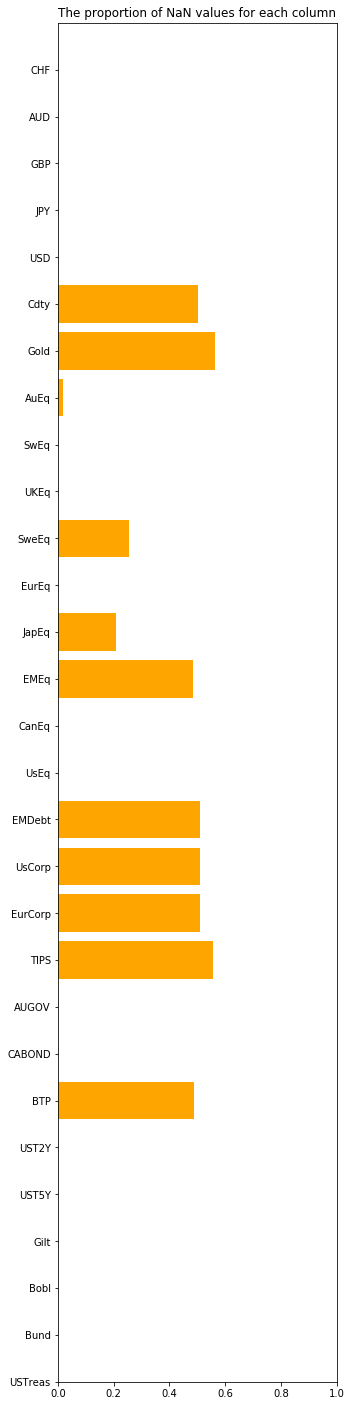

In [14]:
# Visualize NaN
plt.figure(figsize=(5,25))
plt.title('The proportion of NaN values for each column')
plt.barh(df.columns,df.isnull().mean(),color='orange')  
plt.ylim(0,len(df.columns))
plt.xlim(0,1)

### Dealing with missing values and frequency

In [15]:
def removenans(df):
    '''Remove leading NaNs from df.
    
    Args:
        df (dataframe or series): DataFrames whose columns are variables and 
            indexed by date
        inplace (bool): save to original dataframe
        
    Returns:
        df (dataframe or series): DataFrame without missing values
    
    Exception:
        if every row in df has at least one NaN or if there are
        non-leading NaNs in df. Returns dataframe or series depending on input.

    '''
    row = 0
    while ((row < len(df)) and (df.iloc[row,:].isnull().sum() != 0)):
        row += 1
    if row == len(df):
        # interrupt the program
        raise Exception('Every date has at least one NaN.')
    # subset dataframes
    df = df.iloc[row:,:]
    # check if there are still missings
    if ((~np.isfinite(df)).sum().sum() != 0):
        # still complete the program but raises a warning
        warnings.warn('There are still NaNs in df_in')
    return df

In [16]:
df = removenans(df)

/Users/plonfat/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: There are still NaNs in df_in


## Analysing the missing values

In [17]:
# to nagivate through time we need to keep the timestamp format for the indexing 
df.loc[[pd.Timestamp('2011-04-13')]]

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2011-04-13,1.755394,1.39857,1.286908,1.2788,1.534658,1.245144,1.033007,1.554119,1.160873,1.08414,...,0.890622,0.942538,1.459548,0.988809,1.185025,0.691133,0.843157,0.698487,1.111875,1.23733


In [18]:
# find in which columns there are still NaNs
df.isnull().sum()

instrumentid
USTreas      0
Bund         0
Bobl         0
Gilt         0
UST5Y        0
UST2Y        0
BTP          0
CABOND       0
AUGOV        0
TIPS       244
EurCorp      0
UsCorp       0
EMDebt       0
UsEq         1
CanEq        0
EMEq         0
JapEq        0
EurEq        0
SweEq        0
UKEq         0
SwEq         0
AuEq         0
Gold         0
Cdty         0
USD          0
JPY          0
GBP          0
AUD          0
CHF          1
dtype: int64

In [19]:
# understand the frequency of the missing values
col = 'TIPS'
time = df.index
line = np.ones(len(time))
bol = df[col].isnull()

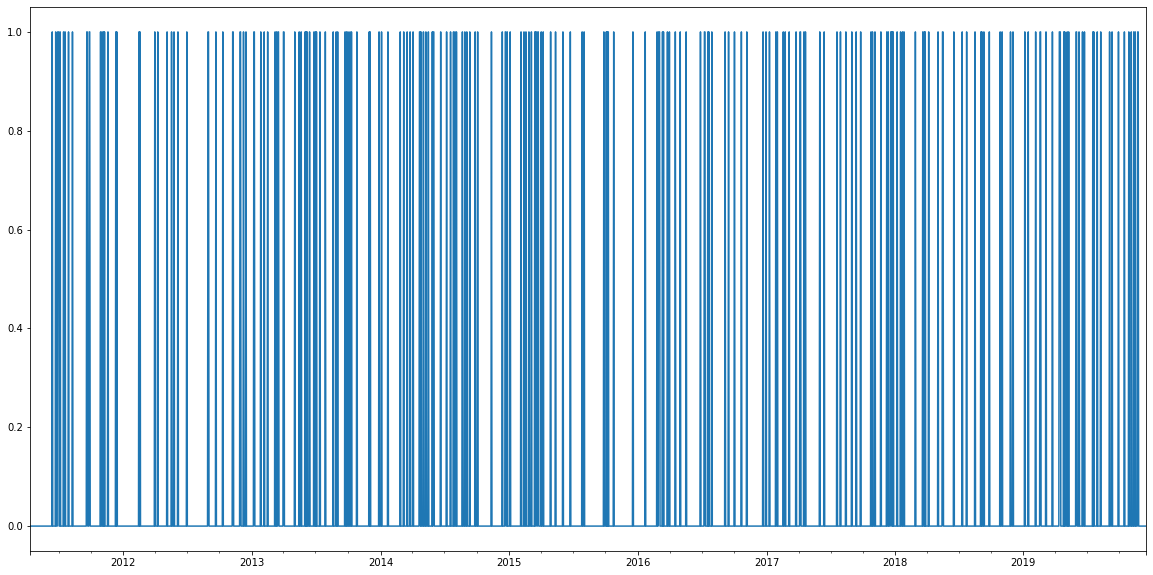

In [20]:
bol.astype(float).plot(figsize=(20,10))

In [21]:
df['TIPS']

2011-04-12    1.084010
2011-04-13    1.084140
2011-04-14    1.087418
2011-04-15    1.096520
2011-04-18    1.114804
                ...   
2019-12-10    1.848411
2019-12-11    1.854452
2019-12-12    1.838163
2019-12-13    1.844446
2019-12-16    1.838467
Freq: B, Name: TIPS, Length: 2265, dtype: float64

In [22]:
# Droping col = 'TIPS'
df = df.drop(columns=['TIPS'])

In [23]:
# Foward filling
df = df.ffill()

In [24]:
df.isnull().sum().sum()

0

## Removing potential errors

In [25]:
# IN CASE OF TIME SERIES PUT NA AND FFILL

#df5 = df5.loc[df5.energy_kcal <= 900]
#df5 = df5.loc[df5.carbohydrates_100g >= df5.sugars_100g]
#df5 = df5.loc[df5.g_sum <= 100]

#df5.reset_index(drop=True)

## Analysing outliers

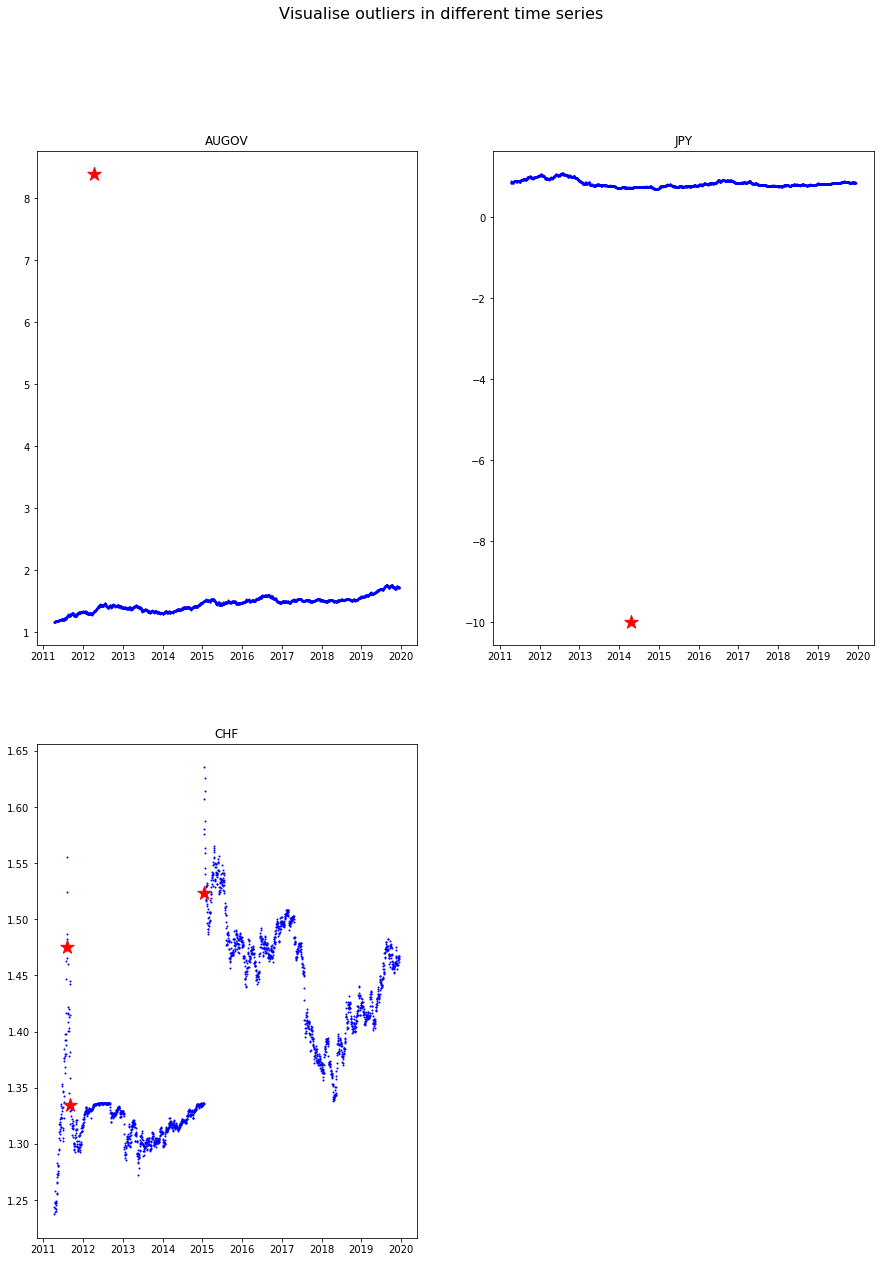

In [37]:
# Setting the std threshold
std = 20

# Need to transform into returns
df_ret = df / df.shift(1) - 1
df_ret.dropna(inplace = True)

# Deleting the first line of df
df_pr = df.copy()
df_pr = df_pr.iloc[1:,:]

# Traditional z-score calculation, (unfortunately biased by extreme observations)
#z_score = (X - X.mean(axis=0)) / X.std(axis=0)

# Robust z_score by using median absolution deviation
z_score_rob = (df_ret - df_ret.median(axis=0)) / df_ret.mad(axis=0)
outliers_idx = (z_score_rob.abs() > std)

# Set a copy for modifications
outliers_idx2 = outliers_idx.copy() 

# Find dates where there are outliers 
dates_raw = outliers_idx.index[outliers_idx.sum(axis=1) >= 1]
bol = list(outliers_idx.sum(axis=0) > 0)
cols = df.columns[bol]

# Find columns where there are outliers
# Filter "real" outliers date
for col in cols:
    for i, date in enumerate(dates_raw[:-1]):
        j = i + 1
        date2 = dates_raw[j]
        datedif = date2 - date

        if datedif.days == 1:
            outliers_idx2.loc[date2,col] = False

# Extracting ouliers from df
df_out = df_pr[outliers_idx2]
df_in = df_pr[~outliers_idx2]

#Creating the charts:
ncol=2   #for subplot
nrow=math.ceil(len(cols)/ncol)   #for subplot
idx=len(cols)

fig = plt.figure()

fig.suptitle('Visualise outliers in different time series', fontsize=16)

fig.set_figheight(20)
fig.set_figwidth(15)

for i in range(idx):
    ax = fig.add_subplot(nrow,ncol,i+1)
    col = cols[i]
    ax.scatter(df_in.index, df_in.loc[:,col], color='blue', s=1, label='normal points')
    df_temp = df_out.loc[:,col].dropna()
    ax.scatter(df_temp.index, df_temp, color='red',marker='*', s=200, label='outliers')
    ax.set_title(col)